## Import des libraries

In [16]:
import numpy as np
import torch
import torch.nn as nn

## Téléchargement du dataset

In [17]:
# Cifar 100
import torchvision
from torchvision import transforms

transform = transforms.Compose([
	transforms.ToTensor(),
])

trainset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR100(root='./data', train=False, download=True, transform=transform)

X_train = trainset.data
X_test = testset.data
Y_train = np.array(trainset.targets)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000,)


## Affichage des données

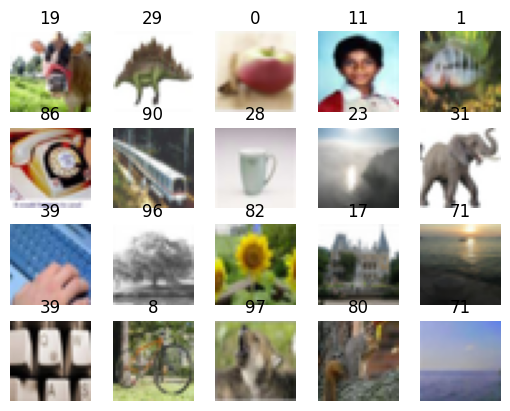

In [18]:
import matplotlib.pyplot as plt

for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(Y_train[i])
    plt.axis('off')

## Batch les données

In [6]:
batch_size = 50
X_train_reshaped = X_train.reshape(-1, batch_size, 32, 32, 3)
X_test_reshaped = X_test.reshape(-1, batch_size, 32, 32, 3)
Y_train_reshaped = Y_train.reshape(-1, batch_size)

## Convertir les données en torch.tensor

In [7]:
X_train_torch = torch.from_numpy(X_train_reshaped).float()
Y_train_torch = torch.from_numpy(Y_train_reshaped).long()

## Créer le modèle

In [8]:
class Baseline(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Linear(32*32*3, 100)

    def forward(self, x):
        x = self.linear(self.flatten(x))
        return x

## Boucle d'entraînement

In [9]:
loss_fn = nn.CrossEntropyLoss()
model = Baseline()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for i in range(len(X_train_torch)):
        optimizer.zero_grad()
        X = X_train_torch[i]
        Y = Y_train_torch[i]
        X_pred = model(X)
        loss = loss_fn(X_pred, Y)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f"Epoch {epoch}, iter {i}, loss {loss.item():.2f}")

Epoch 0, iter 0, loss 272.44
Epoch 0, iter 100, loss 731.36
Epoch 0, iter 200, loss 326.67
Epoch 0, iter 300, loss 360.04
Epoch 0, iter 400, loss 395.40
Epoch 0, iter 500, loss 393.30
Epoch 0, iter 600, loss 337.00
Epoch 0, iter 700, loss 285.62
Epoch 0, iter 800, loss 297.71
Epoch 0, iter 900, loss 367.37
Epoch 1, iter 0, loss 432.39
Epoch 1, iter 100, loss 525.39
Epoch 1, iter 200, loss 505.98
Epoch 1, iter 300, loss 368.08
Epoch 1, iter 400, loss 525.87
Epoch 1, iter 500, loss 495.47
Epoch 1, iter 600, loss 341.66
Epoch 1, iter 700, loss 349.39
Epoch 1, iter 800, loss 367.81
Epoch 1, iter 900, loss 338.30
Epoch 2, iter 0, loss 345.03
Epoch 2, iter 100, loss 308.79
Epoch 2, iter 200, loss 527.65
Epoch 2, iter 300, loss 593.36
Epoch 2, iter 400, loss 455.68
Epoch 2, iter 500, loss 319.93
Epoch 2, iter 600, loss 319.89
Epoch 2, iter 700, loss 344.14
Epoch 2, iter 800, loss 323.64
Epoch 2, iter 900, loss 397.65
Epoch 3, iter 0, loss 413.16
Epoch 3, iter 100, loss 395.35
Epoch 3, iter 20

## Prédiction

Vous pouvez soumettre vos prédictions (le fichier predictions.npy) sur le site du challenge : https://sharing.cs-campus.fr/compete/90

In [13]:
X_test_torch = torch.from_numpy(X_test_reshaped).float()

predictions = []
for i in range(len(X_test_torch)):
    X = X_test_torch[i]
    X_pred = model(X)
    predictions.append(np.argmax(X_pred.detach().numpy(), axis=1))

predictions = np.array(predictions)
predictions = predictions.reshape(-1)

np.save('predictions.npy', predictions)

## Visualiser les résultats

In [14]:
print(predictions.shape)

(10000,)
